# WebScraping-Sephora: Step 3. Exploratory Data Analysis
NYCDSA web scraping project

---
## Project Description
The goal of this project is to explore the color spectrum of the foundations and lipsticks given reviewer's dominant colors (hair color, eye color, and skin tone from Sephora's reviewer inputs) to see if particular features are strongly correlated between the purchased and liked foundation and lipstick colors.

Please see Readme.md for more information including the Repository layout.


### Project Outline
- Step 1. Scrape product URLs
- Step 2. Scrape product reviews
- Step 3. Load all data and explore data
- Step 4. Statistical Analysis

---
### Step 3. Exploratory Data Analysis
All csv files were loaded into a single data frame. All review data (hair/eye colors, skin tones, color RGB vectors from the reviewed product swatches) were explored.

In [1]:
import glob
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from patsy.contrasts import Treatment

import seaborn as sns
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Load and concatenate all data into a single list
all_filenames = [i for i in glob.glob('data/product_info_*.csv')]
df_All = pd.concat([pd.read_csv(f) for f in all_filenames ])
df_All.head()

,Category,Product,Price,UserName,UserID,Rating,Eyecolor,Haircolor,Skintone,SwatchID,R,G,B
0,foundation-makeup,Hourglass Vanish™ Seamless Finish Liquid Found...,56.0,Stacey1318,8223130385,5,brown,brunette,olive,2174688,179.369599,125.492284,89.782407
1,foundation-makeup,Hourglass Vanish™ Seamless Finish Liquid Found...,56.0,chichi1955,1110810926,5,brown,gray,olive,2174787,184.980710,137.351852,91.733025
2,foundation-makeup,Hourglass Vanish™ Seamless Finish Liquid Found...,56.0,plummielove,1691671899,5,brown,brunette,deep,2174753,119.489969,62.862654,33.707562
3,foundation-makeup,Hourglass Vanish™ Seamless Finish Liquid Found...,56.0,littleteapot19,6850079185,5,brown,brunette,medium,2174688,179.369599,125.492284,89.782407
4,foundation-makeup,Hourglass Vanish™ Seamless Finish Liquid Found...,56.0,kimberly201,8571157096,5,gray,black,tan,2174506,156.395833,105.610340,60.895062


In [4]:
## Clean data to contain only the reviews with Rating >=4

# Get total number of reviews
N_scraped = df_All.shape[0]              # Total number of scraped reviews
print('Total number of scraped data: {}'.format(N_scraped))

# Drop rows with less than 4 stars in rating
df = df_All[df_All.Rating != 3].copy()
N_df = df.shape[0] 
print('Total number of data with Ratings of 4 or 5: {}'.format(N_df))

df.index = range(0,N_df)             # Set index to non-overlapping numbers
N_uniqueID = len(set(df.UserID))     # Number of unique author IDs
print('Total number of unique author IDs: {}'.format(N_uniqueID))
N_uniqueName = len(set(df.UserName)) # Number of unique Nicknames
print('Total number of unique reviewer Nicknames: {}'.format(N_uniqueName))

# Nickname yields more paired dataset than the author ID

Total number of scraped data: 184290
Total number of data with Ratings of 4 or 5: 176958
Total number of unique author IDs: 127859
Total number of unique reviewer Nicknames: 125759


In [5]:
## Add luminosity to characterize foundation and lipstick color brightness/darkness
df['Luminosity'] = (df.R*0.299+ df.G*0.587 + df.B*0.114)/256
%store 'df'
df.head()

Stored 'df' (DataFrame)


,Category,Product,Price,UserName,UserID,Rating,Eyecolor,Haircolor,Skintone,SwatchID,R,G,B,Luminosity
0,foundation-makeup,Hourglass Vanish™ Seamless Finish Liquid Found...,56.0,Stacey1318,8223130385,5,brown,brunette,olive,2174688,179.369599,125.492284,89.782407,0.537229
1,foundation-makeup,Hourglass Vanish™ Seamless Finish Liquid Found...,56.0,chichi1955,1110810926,5,brown,gray,olive,2174787,184.980710,137.351852,91.733025,0.571845
2,foundation-makeup,Hourglass Vanish™ Seamless Finish Liquid Found...,56.0,plummielove,1691671899,5,brown,brunette,deep,2174753,119.489969,62.862654,33.707562,0.298713
3,foundation-makeup,Hourglass Vanish™ Seamless Finish Liquid Found...,56.0,littleteapot19,6850079185,5,brown,brunette,medium,2174688,179.369599,125.492284,89.782407,0.537229
4,foundation-makeup,Hourglass Vanish™ Seamless Finish Liquid Found...,56.0,kimberly201,8571157096,5,gray,black,tan,2174506,156.395833,105.610340,60.895062,0.451944


In [6]:
N_Foundation = len(set(df[df.Category == 'foundation-makeup']['Product']))
print('Total number of unique foundation products: {}'.format(N_Foundation))
N_FoundationShade = len(set(df[df.Category == 'foundation-makeup']['Luminosity']))
print('Total number of unique foundation shades: {}'.format(N_FoundationShade))

N_Lipstick = len(set(df[df.Category == 'lipstick']['Product']))
print('Total number of unique lipstick products: {}'.format(N_Lipstick))
N_LipstickShade = len(set(df[df.Category == 'lipstick']['Luminosity']))
print('Total number of unique lipstick shades: {}'.format(N_LipstickShade))

Total number of unique foundation products: 191
Total number of unique foundation shades: 3689
Total number of unique lipstick products: 230
Total number of unique lipstick shades: 3083


---
## Basic Review Data Summaries

### Pie charts of the reviewer's data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


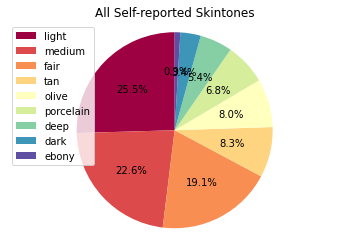

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


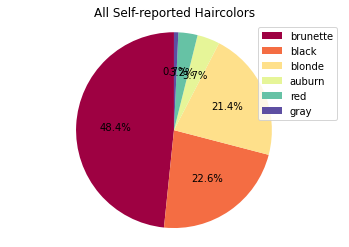

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


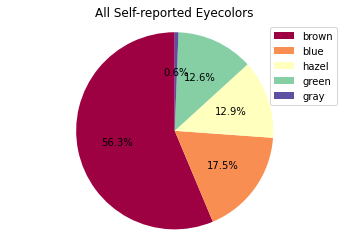

In [7]:
# Skintone
plt.figure()
df_skin = df.groupby('Skintone')['R'].agg(['count']).sort_values(by='count',ascending=False)
cmap = plt.get_cmap('Spectral')
pie_colors = [cmap(i) for i in np.linspace(0, 1, 9)]
patches= plt.pie(df_skin['count'],colors=pie_colors,autopct='%1.1f%%',startangle=90)
plt.legend(patches, labels=df_skin.index.tolist(), loc="best")
plt.axis('equal')
plt.title('All Self-reported Skintones')
plt.savefig('figures/Pie_all_skintone.eps')
plt.savefig('figures/Pie_all_skintone.png')
plt.show()

# Haircolor
plt.figure()
df_hair = df.groupby('Haircolor')['R'].agg(['count']).sort_values(by='count',ascending=False)
pie_colors = [cmap(i) for i in np.linspace(0, 1, 6)]
patches= plt.pie(df_hair['count'],colors=pie_colors,autopct='%1.1f%%',startangle=90)
plt.legend(patches, labels=df_hair.index.tolist() , loc="best")
plt.axis('equal')
plt.title('All Self-reported Haircolors')
plt.savefig('figures/Pie_all_haircolor.eps')
plt.savefig('figures/Pie_all_haircolor.png')
plt.show()

# Eyecolor
plt.figure()
df_eye = df.groupby('Eyecolor')['R'].agg(['count']).sort_values(by='count',ascending=False)
pie_colors = [cmap(i) for i in np.linspace(0, 1, 5)]
patches= plt.pie(df_eye['count'],colors=pie_colors,autopct='%1.1f%%',startangle=90)
plt.legend(patches, labels=df_eye.index.tolist() , loc="best")
plt.axis('equal')
plt.title('All Self-reported Eyecolors')
plt.savefig('figures/Pie_all_eyecolor.eps')
plt.savefig('figures/Pie_all_eyecolor.png')
plt.show()

### Plot makeup colors in RGB space - 3D scatter plots

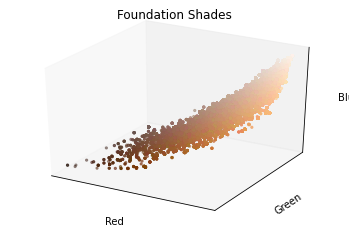

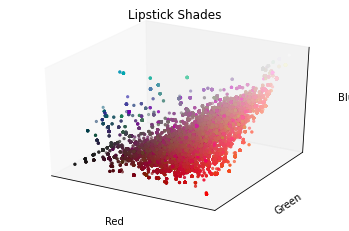

In [8]:
norm = colors.Normalize(vmin=-1.,vmax=1.)

# Plot foundation colors
RGB_foundation = np.array(df[df.Category == 'foundation-makeup'][['R','G','B']].copy())
R_f = RGB_foundation[:,0]
G_f = RGB_foundation[:,1]
B_f = RGB_foundation[:,2]
norm.autoscale(RGB_foundation)
foundation_colors = norm(RGB_foundation).tolist()

fig_f = plt.figure()
axis = fig_f.add_subplot(1, 1, 1, projection="3d")
axis.scatter(R_f, G_f, B_f, facecolors=foundation_colors, marker=".")
axis.get_xaxis().set_ticks([])
axis.get_yaxis().set_ticks([])
axis.get_zaxis().set_ticks([])
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.title('Foundation Shades')
plt.savefig('figures/Scatter3d_all_foundation.png')
plt.savefig('figures/Scatter3d_all_foundation.pdf')

plt.show()

# Plot lipstick colors
RGB_lipstick = np.array(df[df.Category == 'lipstick'][['R','G','B']].copy())
R_l = RGB_lipstick[:,0]
G_l = RGB_lipstick[:,1]
B_l = RGB_lipstick[:,2]
norm.autoscale(RGB_lipstick)
lipstick_colors = norm(RGB_lipstick).tolist()

fig_l = plt.figure()
axis = fig_l.add_subplot(1, 1, 1, projection="3d")
axis.scatter(R_l, G_l, B_l, facecolors=lipstick_colors, marker=".")
axis.get_xaxis().set_ticks([])
axis.get_yaxis().set_ticks([])
axis.get_zaxis().set_ticks([])
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.title('Lipstick Shades')
plt.savefig('figures/Scatter3d_all_lipstick.png')
plt.savefig('figures/Scatter3d_all_lipstick.pdf')

plt.show()

---
## EDA per category

### Pie charts & boxplots for foundations

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Stored 'skintone_colors' (list)


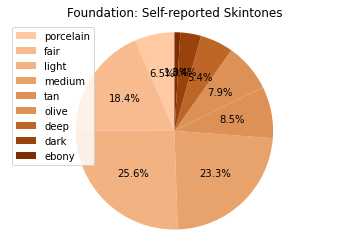

Stored 'skintones' (list)


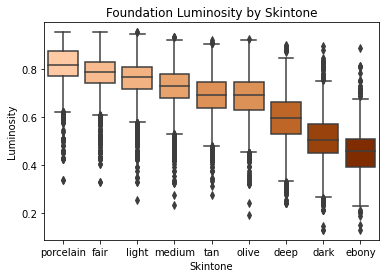

In [10]:
## Skintone 
# piechart
df_skin = df[df.Category == 'foundation-makeup'].groupby('Skintone')['R','G','B','Luminosity'].agg({'R':['count','mean'],'G':'mean','B':'mean','Luminosity':'median'})
df_skin.columns=['count','R','G','B','Luminosity']
df_skin = df_skin.sort_values(by='Luminosity',ascending=False)
skin_colors = np.array(df_skin[['R','G','B']])
norm.autoscale(skin_colors)
skin_colors = norm(skin_colors).tolist()
skintone_colors = skin_colors  # save for the later use
%store 'skintone_colors'

plt.figure()
patches= plt.pie(df_skin['count'], colors = skin_colors, autopct='%1.1f%%',startangle=90)
plt.legend(patches, labels=df_skin.index.tolist(), loc="best")
plt.axis('equal')
plt.title('Foundation: Self-reported Skintones')
plt.savefig('figures/Pie_foundation_skintone.eps')
plt.savefig('figures/Pie_foundation_skintone.png')
plt.show()

# boxplot 
skintones=df_skin.index.tolist()
%store 'skintones'
color_dict = dict(zip(skintones, skin_colors))
bplot = sns.boxplot(x='Skintone', y='Luminosity', data=df[df.Category == 'foundation-makeup'], order=skintones)
for i in range(0,len(df_skin.index.tolist())):
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[skintones[i]])
plt.title('Foundation Luminosity by Skintone')
plt.savefig('figures/Box_foundation_skintone.eps')
plt.savefig('figures/Box_foundation_skintone.png')    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


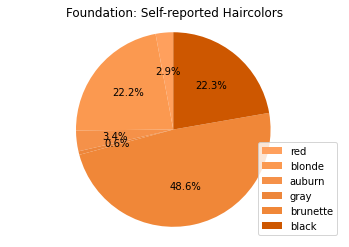

Stored 'haircolors' (list)


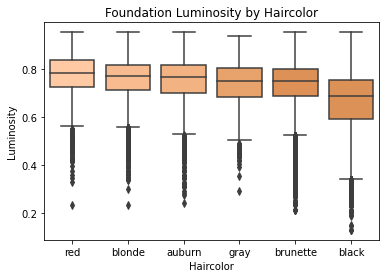

In [13]:
## Haircolor
# piechart
df_hair = df[df.Category == 'foundation-makeup'].groupby('Haircolor')['R','G','B','Luminosity'].agg({'R':['count','mean'],'G':'mean','B':'mean','Luminosity':'median'})
df_hair.columns=['count','R','G','B','Luminosity']
df_hair= df_hair.sort_values(by='Luminosity',ascending=False)
hair_colors = np.array(df_hair[['R','G','B']])
norm.autoscale(hair_colors)
hair_colors = norm(hair_colors).tolist()

plt.figure()
patches= plt.pie(df_hair['count'],colors=hair_colors,autopct='%1.1f%%',startangle=90)
plt.legend(patches, labels=df_hair.index.tolist() , loc="best")
plt.axis('equal')
plt.title('Foundation: Self-reported Haircolors')
plt.savefig('figures/Pie_foundation_haircolor.eps')
plt.savefig('figures/Pie_foundation_haircolor.png')
plt.show()

# boxplot 
haircolors=df_hair.index.tolist()
%store 'haircolors'
color_dict = dict(zip(haircolors, skin_colors))
bplot = sns.boxplot(x='Haircolor', y='Luminosity', data=df[df.Category == 'foundation-makeup'], order=haircolors)
for i in range(0,len(df_hair.index.tolist())):
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[haircolors[i]])
plt.title('Foundation Luminosity by Haircolor')
plt.savefig('figures/Box_foundation_haircolor.eps')
plt.savefig('figures/Box_foundation_haircolor.png')    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


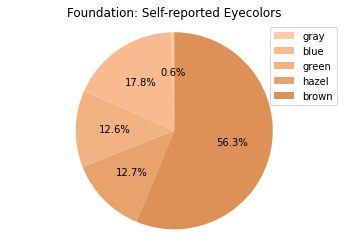

Stored 'eyecolors' (list)


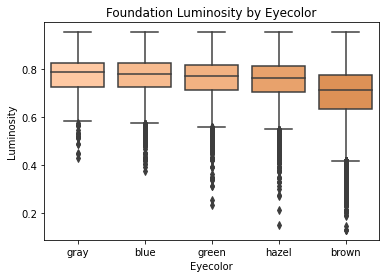

In [14]:
## Eyecolor
df_eye = df[df.Category == 'foundation-makeup'].groupby('Eyecolor')['R','G','B','Luminosity'].agg({'R':['count','mean'],'G':'mean','B':'mean','Luminosity':'median'})
df_eye.columns=['count','R','G','B','Luminosity']
df_eye = df_eye.sort_values(by='Luminosity',ascending=False)
eye_colors = np.array(df_skin[['R','G','B']])
norm.autoscale(eye_colors)
eye_colors = norm(eye_colors).tolist()

plt.figure()
patches= plt.pie(df_eye['count'], colors=eye_colors,autopct='%1.1f%%',startangle=90)
plt.legend(patches, labels=df_eye.index.tolist() , loc="best")
plt.axis('equal')
plt.title('Foundation: Self-reported Eyecolors')
plt.savefig('figures/Pie_foundation_eyecolor.eps')
plt.savefig('figures/Pie_foundation_eyecolor.png')
plt.show()

# boxplot 
eyecolors=df_eye.index.tolist()
%store 'eyecolors'
color_dict = dict(zip(eyecolors, skin_colors))
bplot = sns.boxplot(x='Eyecolor', y='Luminosity', data=df[df.Category == 'foundation-makeup'], order=eyecolors)
for i in range(0,len(df_eye.index.tolist())):
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[eyecolors[i]])
plt.title('Foundation Luminosity by Eyecolor')
plt.savefig('figures/Box_foundation_eyecolor.eps')
plt.savefig('figures/Box_foundation_eyecolor.png')   

### R G B distributions by Reviewer's color trait categories

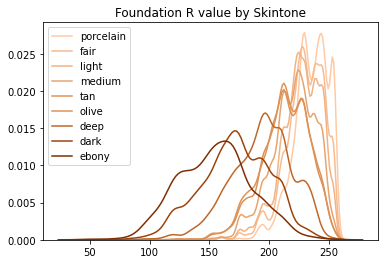

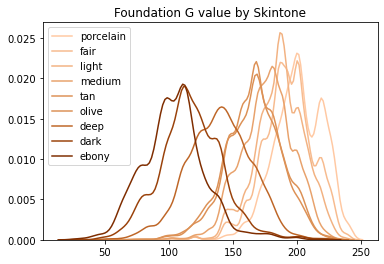

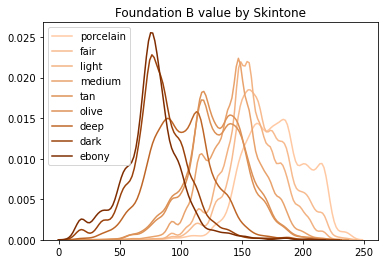

In [15]:
# Foundation
fig_R, ax_R = plt.subplots()
fig_G, ax_G = plt.subplots()
fig_B, ax_B = plt.subplots()
for i_skin, skintone in enumerate(skintones):
    sns.distplot(df[(df.Category == 'foundation-makeup') & (df.Skintone == skintone)][['R']], label=skintone,
                 hist=False,color=skin_colors[i_skin],ax=ax_R)
    sns.distplot(df[(df.Category == 'foundation-makeup') & (df.Skintone == skintone)][['G']], label=skintone,
                 hist=False,color=skin_colors[i_skin],ax=ax_G)
    sns.distplot(df[(df.Category == 'foundation-makeup') & (df.Skintone == skintone)][['B']], label=skintone,
                 hist=False,color=skin_colors[i_skin],ax=ax_B)
ax_R.legend()
ax_R.set_title('Foundation R value by Skintone')
ax_G.legend()
ax_G.set_title('Foundation G value by Skintone')
ax_B.legend()
ax_B.set_title('Foundation B value by Skintone')

plt.show()

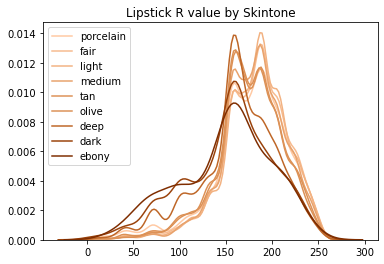

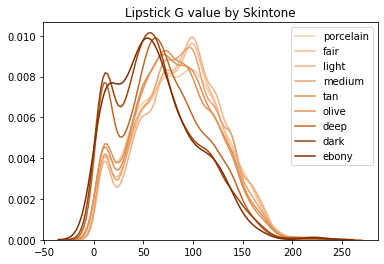

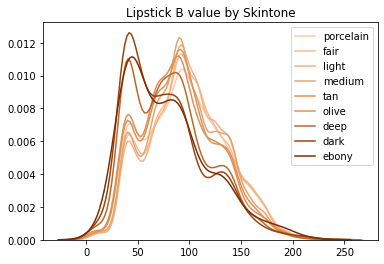

In [16]:
## Lipstick
# Skintone
fig_R, ax_R = plt.subplots()
fig_G, ax_G = plt.subplots()
fig_B, ax_B = plt.subplots()
for i_skin, skintone in enumerate(skintones):
    sns.distplot(df[(df.Category == 'lipstick') & (df.Skintone == skintone)][['R']], label=skintone,
                 hist=False,color=skin_colors[i_skin],ax=ax_R)
    sns.distplot(df[(df.Category == 'lipstick') & (df.Skintone == skintone)][['G']], label=skintone,
                 hist=False,color=skin_colors[i_skin],ax=ax_G)
    sns.distplot(df[(df.Category == 'lipstick') & (df.Skintone == skintone)][['B']], label=skintone,
                 hist=False,color=skin_colors[i_skin],ax=ax_B)
ax_R.legend()
ax_R.set_title('Lipstick R value by Skintone')
ax_G.legend()
ax_G.set_title('Lipstick G value by Skintone')
ax_B.legend()
ax_B.set_title('Lipstick B value by Skintone')

plt.show()

Stored 'haircolor_colors' (list)


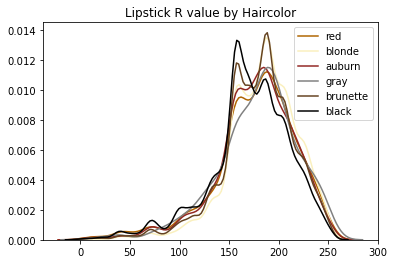

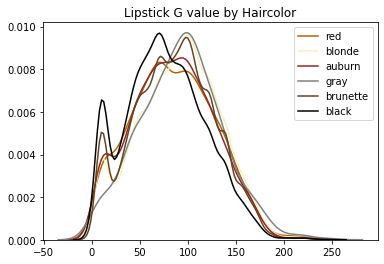

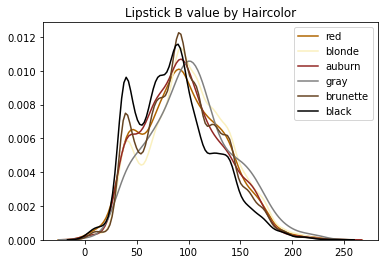

In [17]:
## Lipstick by haircolor
fig_R, ax_R = plt.subplots()
fig_G, ax_G = plt.subplots()
fig_B, ax_B = plt.subplots()
hair_colors=[[0.69, 0.396, 0],[0.98, 0.941, 0.745],[0.573,0.153,0.141],[0.5, 0.5, 0.5],[0.396,0.263,0.129],[0,0,0]]
haircolor_colors = hair_colors  # save for later use
%store 'haircolor_colors'
for i_hair, haircolor in enumerate(haircolors):
    sns.distplot(df[(df.Category == 'lipstick') & (df.Haircolor == haircolor)][['R']], label=haircolor,
                 hist=False,color=hair_colors[i_hair],ax=ax_R)
    sns.distplot(df[(df.Category == 'lipstick') & (df.Haircolor == haircolor)][['G']], label=haircolor,
                 hist=False,color=hair_colors[i_hair],ax=ax_G)
    sns.distplot(df[(df.Category == 'lipstick') & (df.Haircolor == haircolor)][['B']], label=haircolor,
                 hist=False,color=hair_colors[i_hair],ax=ax_B)
ax_R.legend()
ax_R.set_title('Lipstick R value by Haircolor')
ax_G.legend()
ax_G.set_title('Lipstick G value by Haircolor')
ax_B.legend()
ax_B.set_title('Lipstick B value by Haircolor')

plt.show()

Stored 'eyecolor_colors' (list)


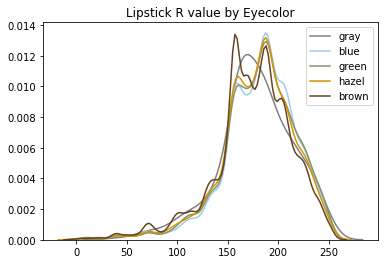

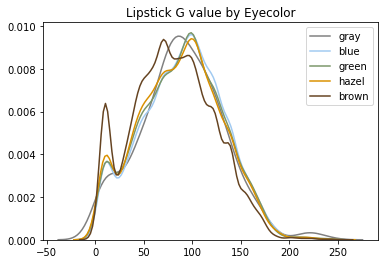

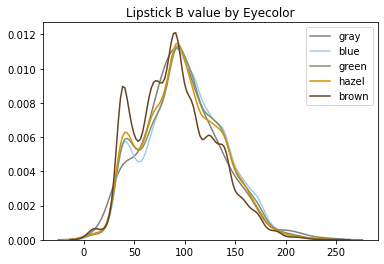

In [18]:
## Lipstick by Eyecolor
fig_R, ax_R = plt.subplots()
fig_G, ax_G = plt.subplots()
fig_B, ax_B = plt.subplots()
eye_colors=[[0.5,0.5,0.5],[0.631,0.792,0.945],[0.482,0.588,0.412],[0.855, 0.569, 0],[0.396,0.263,0.129]]
eyecolor_colors = eye_colors # save for later use
%store 'eyecolor_colors'
for i_eye, eyecolor in enumerate(eyecolors):
    sns.distplot(df[(df.Category == 'lipstick') & (df.Eyecolor == eyecolor)][['R']], label=eyecolor,
                 hist=False,color=eye_colors[i_eye],ax=ax_R)
    sns.distplot(df[(df.Category == 'lipstick') & (df.Eyecolor == eyecolor)][['G']], label=eyecolor,
                 hist=False,color=eye_colors[i_eye],ax=ax_G)
    sns.distplot(df[(df.Category == 'lipstick') & (df.Eyecolor == eyecolor)][['B']], label=eyecolor,
                 hist=False,color=eye_colors[i_eye],ax=ax_B)
ax_R.legend()
ax_R.set_title('Lipstick R value by Eyecolor')
ax_G.legend()
ax_G.set_title('Lipstick G value by Eyecolor')
ax_B.legend()
ax_B.set_title('Lipstick B value by Eyecolor')

plt.show()

### Pie charts & boxplots for foundations

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


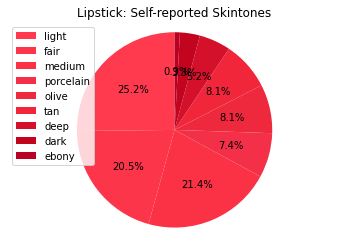

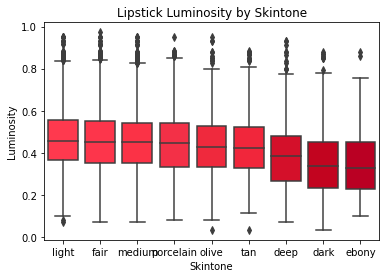

In [19]:
## Skintone
# piechart
df_skin = df[df.Category == 'lipstick'].groupby('Skintone')['R','G','B','Luminosity'].agg({'R':['count','mean'],'G':'mean','B':'mean','Luminosity':'median'})
df_skin.columns=['count','R','G','B','Luminosity']
df_skin = df_skin.sort_values(by='Luminosity',ascending=False)
skin_colors = np.array(df_skin[['R','G','B']])
norm.autoscale(skin_colors)
skin_colors = norm(skin_colors).tolist()

plt.figure()
patches= plt.pie(df_skin['count'], colors = skin_colors, autopct='%1.1f%%',startangle=90)
plt.legend(patches, labels=df_skin.index.tolist(), loc="best")
plt.axis('equal')
plt.title('Lipstick: Self-reported Skintones')
plt.savefig('figures/Pie_lipstick_skintone.eps')
plt.savefig('figures/Pie_lipstick_skintone.png')
plt.show()

# boxplot 
skintones=df_skin.index.tolist()
color_dict = dict(zip(skintones, skin_colors))
bplot = sns.boxplot(x='Skintone', y='Luminosity', data=df[df.Category == 'lipstick'], order=skintones)
for i in range(0,len(df_skin.index.tolist())):
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[skintones[i]])
plt.title('Lipstick Luminosity by Skintone')
plt.savefig('figures/Box_lipstick_skintone.eps')
plt.savefig('figures/Box_lipstick_skintone.png')   

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


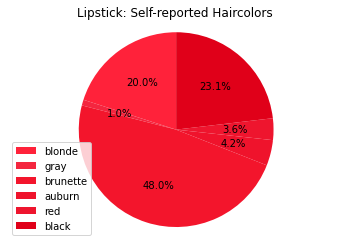

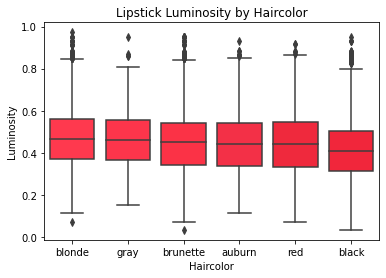

In [20]:
## Haircolor
# piechart
df_hair = df[df.Category == 'lipstick'].groupby('Haircolor')['R','G','B','Luminosity'].agg({'R':['count','mean'],'G':'mean','B':'mean','Luminosity':'median'})
df_hair.columns=['count','R','G','B','Luminosity']
df_hair= df_hair.sort_values(by='Luminosity',ascending=False)
hair_colors = np.array(df_hair[['R','G','B']])
norm.autoscale(hair_colors)
hair_colors = norm(hair_colors).tolist()

plt.figure()
patches= plt.pie(df_hair['count'],colors=hair_colors,autopct='%1.1f%%',startangle=90)
plt.legend(patches, labels=df_hair.index.tolist() , loc="best")
plt.axis('equal')
plt.title('Lipstick: Self-reported Haircolors')
plt.savefig('figures/Pie_lipstick_haircolor.eps')
plt.savefig('figures/Pie_lipstick_haircolor.png')
plt.show()

# boxplot 
haircolors=df_hair.index.tolist()
color_dict = dict(zip(haircolors, skin_colors))
bplot = sns.boxplot(x='Haircolor', y='Luminosity', data=df[df.Category == 'lipstick'], order=haircolors)
for i in range(0,len(df_hair.index.tolist())):
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[haircolors[i]])
plt.title('Lipstick Luminosity by Haircolor')
plt.savefig('figures/Box_lipstick_haircolor.eps')
plt.savefig('figures/Box_lipstick_haircolor.png')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


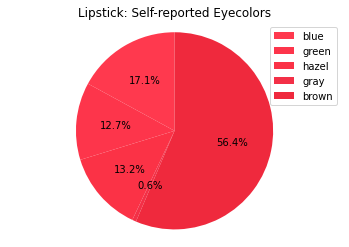

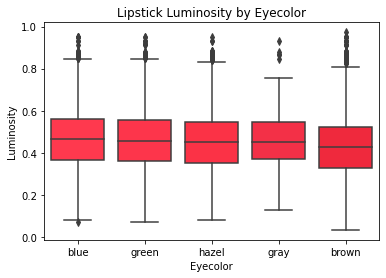

In [21]:
## Eyecolor
# piechart
df_eye = df[df.Category == 'lipstick'].groupby('Eyecolor')['R','G','B','Luminosity'].agg({'R':['count','mean'],'G':'mean','B':'mean','Luminosity':'median'})
df_eye.columns=['count','R','G','B','Luminosity']
df_eye = df_eye.sort_values(by='Luminosity',ascending=False)
eye_colors = np.array(df_skin[['R','G','B']])
norm.autoscale(eye_colors)
eye_colors = norm(eye_colors).tolist()

plt.figure()
patches= plt.pie(df_eye['count'], colors=eye_colors,autopct='%1.1f%%',startangle=90)
plt.legend(patches, labels=df_eye.index.tolist() , loc="best")
plt.axis('equal')
plt.title('Lipstick: Self-reported Eyecolors')
plt.savefig('figures/Pie_lipstick_eyecolor.eps')
plt.savefig('figures/Pie_lipstick_eyecolor.png')
plt.show()

# boxplot 
eyecolors=df_eye.index.tolist()
color_dict = dict(zip(eyecolors, skin_colors))
bplot = sns.boxplot(x='Eyecolor', y='Luminosity', data=df[df.Category == 'lipstick'], order=eyecolors)
for i in range(0,len(df_eye.index.tolist())):
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[eyecolors[i]])
plt.title('Lipstick Luminosity by Eyecolor')
plt.savefig('figures/Box_lipstick_eyecolor.eps')
plt.savefig('figures/Box_lipstick_eyecolor.png')

### Analyze per category - foundation colors in RGB space

Foundation Shades by Skintone


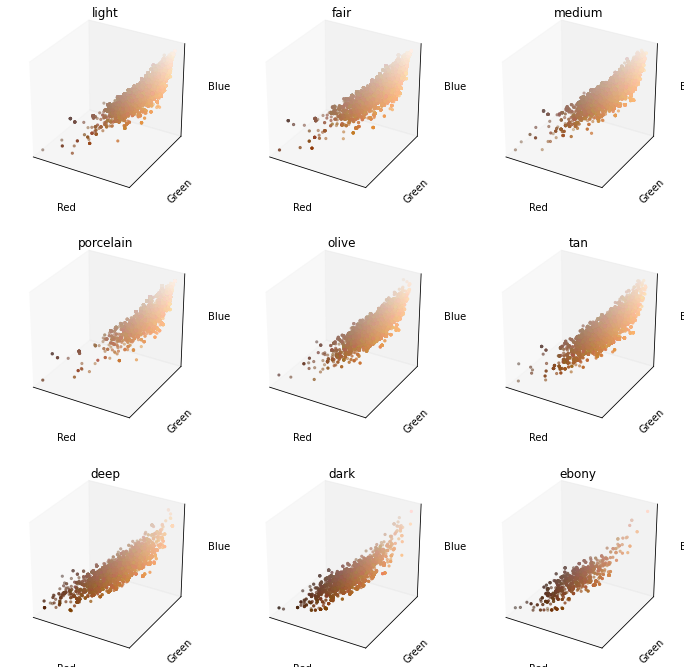



Foundation Shades by Haircolor


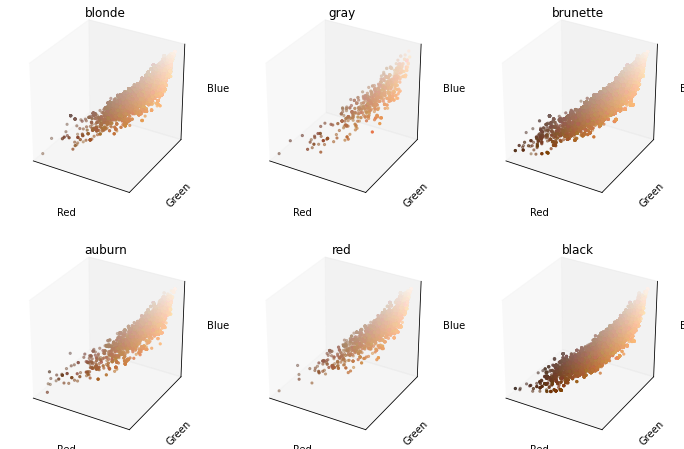



Foundation Shades by Eyecolor


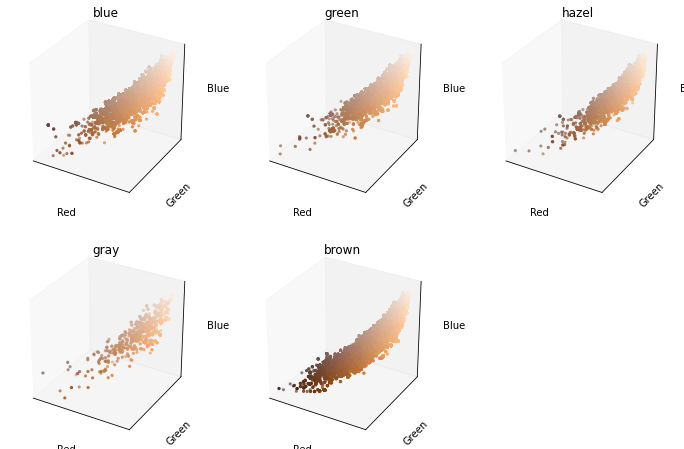

In [22]:
# Skintone
print('Foundation Shades by Skintone')
fig_f = plt.figure(figsize=(12,12))
for idx_skin, skintone in enumerate(df_skin.index.tolist()):
    RGB_foundation = np.array(df[(df.Category == 'foundation-makeup') & (df.Skintone == skintone)][['R','G','B']].copy())
    R_f = RGB_foundation[:,0]
    G_f = RGB_foundation[:,1]
    B_f = RGB_foundation[:,2]

    norm.autoscale(RGB_foundation)
    foundation_colors = norm(RGB_foundation).tolist()
    
    axis = fig_f.add_subplot(3,3,idx_skin+1, projection="3d")
    axis.scatter(R_f, G_f, B_f, facecolors=foundation_colors, marker=".")
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.get_zaxis().set_ticks([])
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.set_title(skintone)
# end of for loop
plt.show()

# Haircolor
print('\n\nFoundation Shades by Haircolor')
fig_h = plt.figure(figsize=(12,8))
for idx_hair, haircolor in enumerate(df_hair.index.tolist()):
    RGB_foundation = np.array(df[(df.Category == 'foundation-makeup') & (df.Haircolor == haircolor)][['R','G','B']].copy())
    R_f = RGB_foundation[:,0]
    G_f = RGB_foundation[:,1]
    B_f = RGB_foundation[:,2]

    norm.autoscale(RGB_foundation)
    foundation_colors = norm(RGB_foundation).tolist()
    
    axis = fig_h.add_subplot(2,3,idx_hair+1, projection="3d")
    axis.scatter(R_f, G_f, B_f, facecolors=foundation_colors, marker=".")
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.get_zaxis().set_ticks([])
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.set_title(haircolor)
# end of for loop
plt.show()

# Eyecolor
print('\n\nFoundation Shades by Eyecolor')
fig_e = plt.figure(figsize=(12,8))
for idx_eye, eyecolor in enumerate(df_eye.index.tolist()):
    RGB_foundation = np.array(df[(df.Category == 'foundation-makeup') & (df.Eyecolor == eyecolor)][['R','G','B']].copy())
    R_f = RGB_foundation[:,0]
    G_f = RGB_foundation[:,1]
    B_f = RGB_foundation[:,2]

    norm.autoscale(RGB_foundation)
    foundation_colors = norm(RGB_foundation).tolist()
    
    axis = fig_e.add_subplot(2,3,idx_eye+1, projection="3d")
    axis.scatter(R_f, G_f, B_f, facecolors=foundation_colors, marker=".")
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.get_zaxis().set_ticks([])
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.set_title(eyecolor)
# end of for loop
plt.show()


### Analyze per category - lipstick colors in RGB space

Lipstick Shades by Skintone


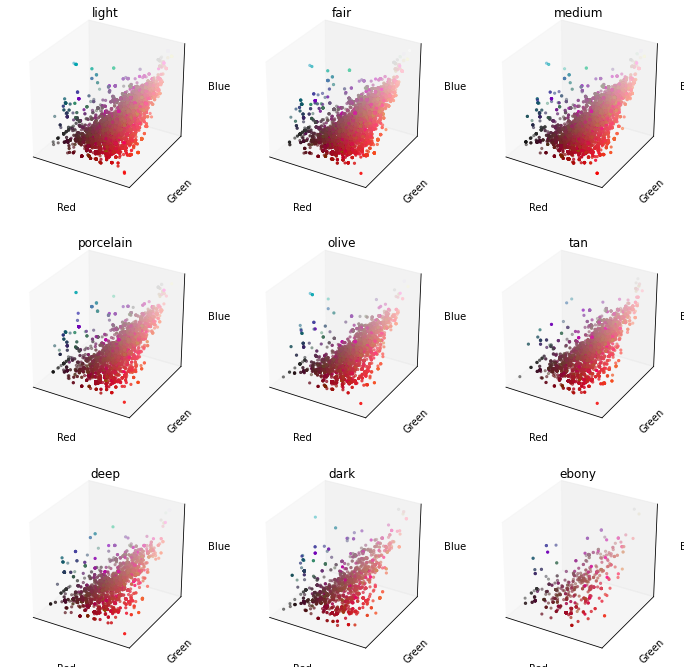



Lipstick Shades by Haircolor


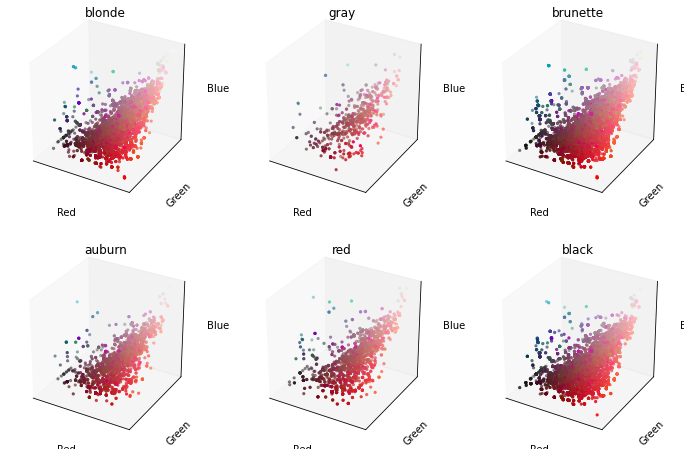



Lipstick Shades by Eyecolor


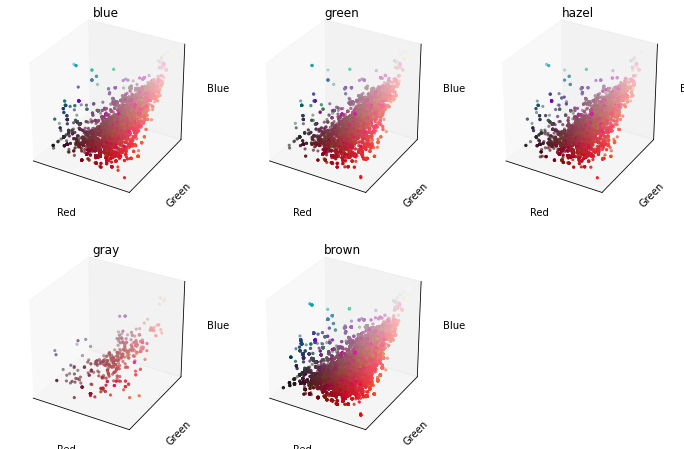

In [23]:
# Skintone
print('Lipstick Shades by Skintone')
fig_l = plt.figure(figsize=(12,12))
for idx_skin, skintone in enumerate(df_skin.index.tolist()):
    RGB_lipstick = np.array(df[(df.Category == 'lipstick') & (df.Skintone == skintone)][['R','G','B']].copy())
    R_l = RGB_lipstick[:,0]
    G_l = RGB_lipstick[:,1]
    B_l = RGB_lipstick[:,2]

    norm.autoscale(RGB_lipstick)
    lipstick_colors = norm(RGB_lipstick).tolist()
    
    axis = fig_l.add_subplot(3,3,idx_skin+1, projection="3d")
    axis.scatter(R_l, G_l, B_l, facecolors=lipstick_colors, marker=".")
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.get_zaxis().set_ticks([])
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.set_title(skintone)
# end of for loop
plt.show()

# Haircolor
print('\n\nLipstick Shades by Haircolor')
fig_h = plt.figure(figsize=(12,8))
for idx_hair, haircolor in enumerate(df_hair.index.tolist()):
    RGB_lipstick = np.array(df[(df.Category == 'lipstick') & (df.Haircolor == haircolor)][['R','G','B']].copy())
    R_l = RGB_lipstick[:,0]
    G_l = RGB_lipstick[:,1]
    B_l = RGB_lipstick[:,2]

    norm.autoscale(RGB_lipstick)
    lipstick_colors = norm(RGB_lipstick).tolist()
    
    axis = fig_h.add_subplot(2,3,idx_hair+1, projection="3d")
    axis.scatter(R_l, G_l, B_l, facecolors=lipstick_colors, marker=".")
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.get_zaxis().set_ticks([])
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.set_title(haircolor)
# end of for loop
plt.show()

# Eyecolor
print('\n\nLipstick Shades by Eyecolor')
fig_e = plt.figure(figsize=(12,8))
for idx_eye, eyecolor in enumerate(df_eye.index.tolist()):
    RGB_lipstick = np.array(df[(df.Category == 'lipstick') & (df.Eyecolor == eyecolor)][['R','G','B']].copy())
    R_l = RGB_lipstick[:,0]
    G_l = RGB_lipstick[:,1]
    B_l = RGB_lipstick[:,2]

    norm.autoscale(RGB_lipstick)
    lipstick_colors = norm(RGB_lipstick).tolist()
    
    axis = fig_e.add_subplot(2,3,idx_eye+1, projection="3d")
    axis.scatter(R_l, G_l, B_l, facecolors=lipstick_colors, marker=".")
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.get_zaxis().set_ticks([])
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.set_title(eyecolor)
# end of for loop
plt.show()

---
## Paired analysis

### Foundation

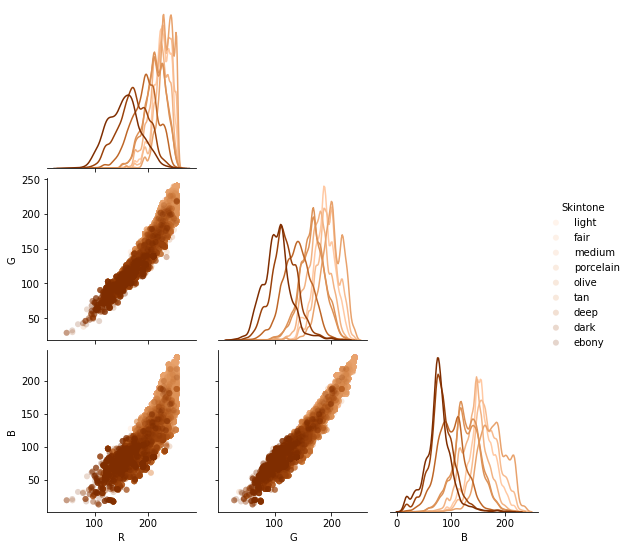

In [25]:
# skintone
customPalette = sns.set_palette(sns.color_palette(skintone_colors))
pair_skin = sns.pairplot(data=df[df.Category == 'foundation-makeup'],vars=['R','G','B'],diag_kind='kde',
                         hue='Skintone',hue_order=skintones,palette=customPalette,
                         plot_kws=dict(alpha=0.2,edgecolor=[]), diag_kws=dict(shade=False), corner=True)
plt.savefig('figures/Pair_skintone_foundation.png')
plt.savefig('figures/Pair_skintone_foundation.pdf')

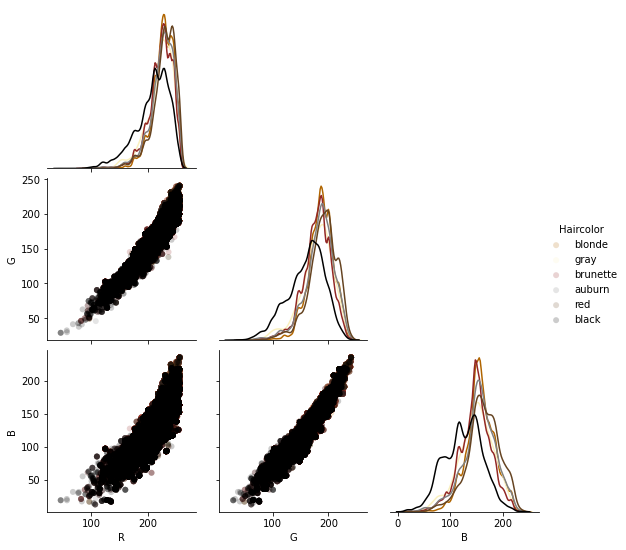

In [26]:
# haircolor
pair_hair = sns.pairplot(data=df[df.Category == 'foundation-makeup'],vars=['R','G','B'],diag_kind='kde',
                         hue='Haircolor',hue_order=haircolors,
                         palette=sns.set_palette(sns.color_palette(haircolor_colors)),
                         plot_kws=dict(alpha=0.2,edgecolor=[]), diag_kws=dict(shade=False), corner=True)
plt.savefig('figures/Pair_haircolor_foundation.png')
plt.savefig('figures/Pair_haircolor_foundation.pdf')

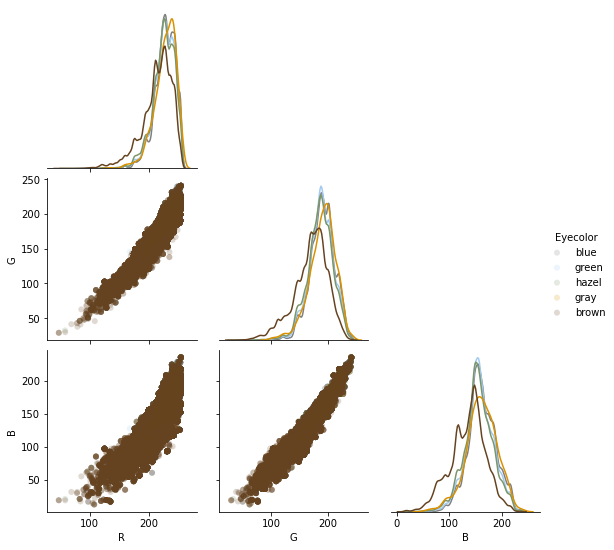

In [27]:
# eyecolor
pair_eye = sns.pairplot(data=df[df.Category == 'foundation-makeup'],vars=['R','G','B'],diag_kind='kde',
                         hue='Eyecolor',hue_order=eyecolors,
                         palette=sns.set_palette(sns.color_palette(eyecolor_colors)),
                         plot_kws=dict(alpha=0.2,edgecolor=[]), diag_kws=dict(shade=False), corner=True)
plt.savefig('figures/Pair_eyecolor_foundation.png')
plt.savefig('figures/Pair_eyecolor_foundation.pdf')

### Lipstick

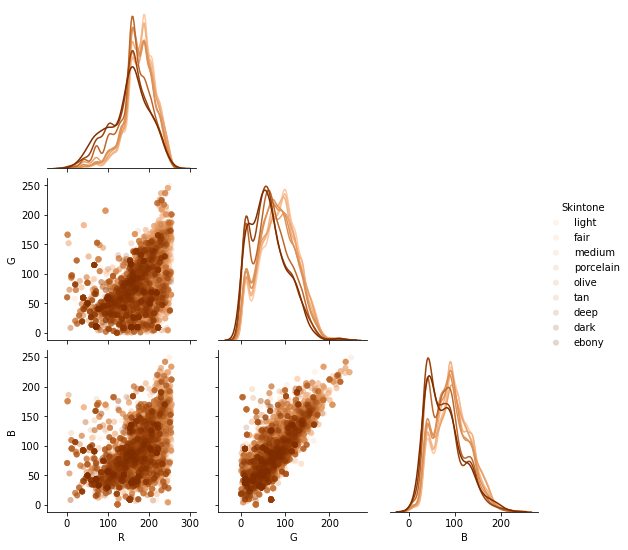

In [28]:
# skintone
pair_skin = sns.pairplot(data=df[df.Category == 'lipstick'],vars=['R','G','B'],diag_kind='kde',
                         hue='Skintone',hue_order=skintones,
                         palette=sns.set_palette(sns.color_palette(skintone_colors)),
                         plot_kws=dict(alpha=0.2,edgecolor=[]), diag_kws=dict(shade=False), corner=True)
plt.savefig('figures/Pair_skintone_lipstick.png')
plt.savefig('figures/Pair_skintone_lipstick.pdf')

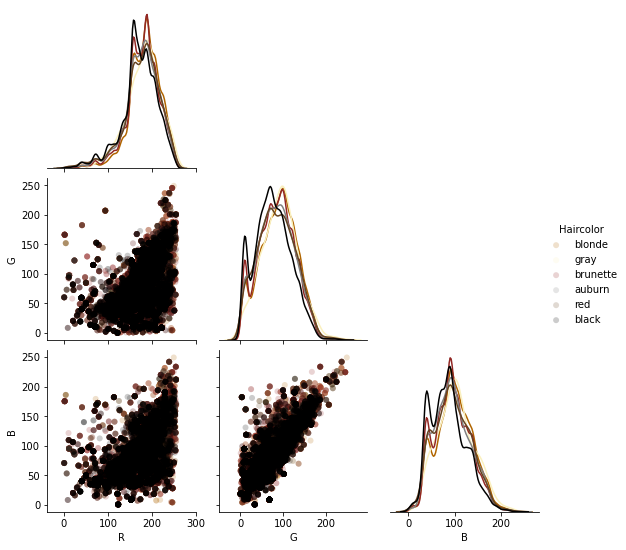

In [29]:
# haircolor
pair_hair = sns.pairplot(data=df[df.Category == 'lipstick'],vars=['R','G','B'],diag_kind='kde',
                         hue='Haircolor',hue_order=haircolors,
                         palette=sns.set_palette(sns.color_palette(haircolor_colors)),
                         plot_kws=dict(alpha=0.2,edgecolor=[]), diag_kws=dict(shade=False), corner=True)
plt.savefig('figures/Pair_haircolor_lipstick.png')
plt.savefig('figures/Pair_haircolor_lipstick.pdf')

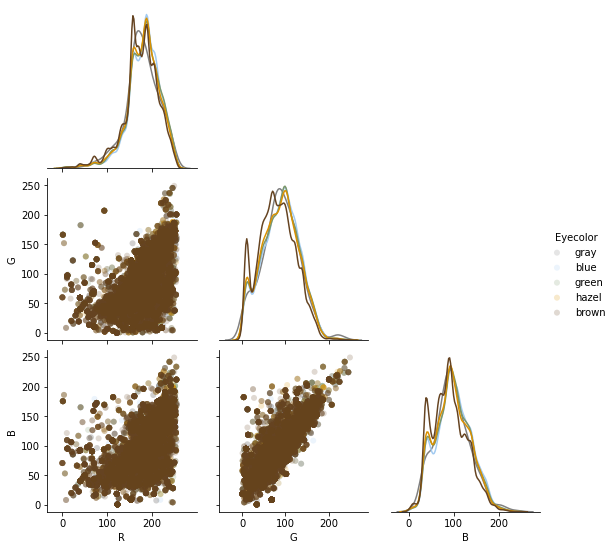

In [202]:
# eyecolor
pair_eye = sns.pairplot(data=df[df.Category == 'lipstick'],vars=['R','G','B'],diag_kind='kde',
                         hue='Eyecolor',hue_order=eyecolors,
                         palette=sns.set_palette(sns.color_palette(eyecolor_colors)),
                         plot_kws=dict(alpha=0.2,edgecolor=[]), diag_kws=dict(shade=False), corner=True)
plt.savefig('figures/Pair_eyecolor_lipstick.png')
plt.savefig('figures/Pair_eyecolor_lipstick.pdf')